In [1]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [2]:
x_features=pd.read_csv('../processed/x_features.csv')
with open("../processed/feature_selection.json", "r") as f:
    feature_names = json.load(f)

x=x_features[feature_names]   
y=pd.read_csv("../processed/target.csv").values.ravel()



X_train, X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Train models 

In [3]:
models= {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True,random_state=42)
}

train_models={}
for name, model in models.items():
    model.fit(X_train,y_train)
    train_models[name]=model


Evaluate models 

In [4]:
for name, model in train_models.items():
    y_pred=model.predict(X_test)
    y_probability= model.predict_proba(X_test)[:,1]
    
    #comparing the acual values of test set with predicted values that model gave
    accu_score=accuracy_score(y_test,y_pred) 
    pre_score=precision_score(y_test,y_pred,zero_division=0)
    re_score=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    auc=roc_auc_score(y_test,y_probability)
    
    
    print(f"\n{name} Results: \n")
    print(f"Accuracy:  {accu_score:.4f}")
    print(f"Precision: {pre_score:.4f}")
    print(f"Recall:    {re_score:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"AUC Score: {auc:.4f}")

    
    


Logistic Regression Results: 

Accuracy:  0.8772
Precision: 0.8077
Recall:    0.9130
F1-Score:  0.8571
AUC Score: 0.9412

Decision Tree Results: 

Accuracy:  0.7895
Precision: 0.7619
Recall:    0.6957
F1-Score:  0.7273
AUC Score: 0.7577

Random Forest Results: 

Accuracy:  0.8246
Precision: 0.7826
Recall:    0.7826
F1-Score:  0.7826
AUC Score: 0.9188

SVM Results: 

Accuracy:  0.8947
Precision: 0.8400
Recall:    0.9130
F1-Score:  0.8750
AUC Score: 0.9373


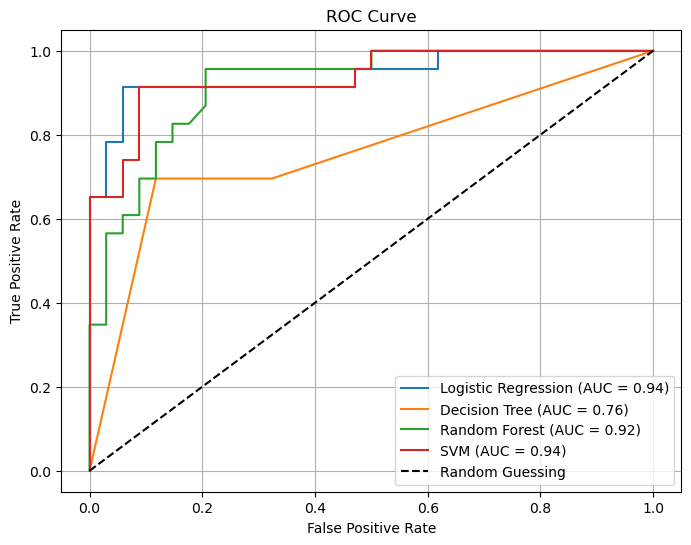

In [5]:
plt.figure(figsize=(8, 6))

for name, model in train_models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()
